In [2]:
#do my own kmeans on a much larger dataset 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

wd ='xx'

sns.set()
sns.set_style("whitegrid") #for whitebackground charts


In [3]:
df =  pd.read_csv('vehicles.csv'
                     ,sep=','
                     #,parse_dates=['ORDER_DT','DDATE']
                     #,usecols=['AUTO_RENEW','CHANGE_DT']
                     #,na_values = 0 cant use zero here
                     #,index_col = ['SKU']
                     #,encoding = "ISO-8859-1"
                     #,dtype={'NEWSLETTER': str}
                     )

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [6]:
df.drop(['url','region_url','image_url','description'],axis=1,inplace=True)


In [7]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'county', 'state', 'lat',
       'long'],
      dtype='object')

In [8]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,county,state,lat,long
0,7088746062,greensboro,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,...,automatic,19UUA8F22CA003926,NaN,NaN,other,blue,NaN,nc,35.7636,-78.7443
1,7088745301,greensboro,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,...,automatic,NaN,rwd,NaN,convertible,blue,NaN,nc,NaN,NaN
2,7088744126,greensboro,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,...,automatic,NaN,NaN,NaN,NaN,blue,NaN,nc,36.1032,-79.8794
3,7088743681,greensboro,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,...,automatic,5J6YH18314L006498,fwd,NaN,SUV,orange,NaN,nc,35.7636,-78.7443
4,7074612539,lincoln,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,...,automatic,1GC1KWE85GF266427,NaN,NaN,NaN,NaN,NaN,ne,41.1345,-96.2458


In [9]:
df.drop(['lat','long'],axis=1,inplace=True)


In [10]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,county,state
0,7088746062,greensboro,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,19UUA8F22CA003926,NaN,NaN,other,blue,NaN,nc
1,7088745301,greensboro,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,NaN,rwd,NaN,convertible,blue,NaN,nc
2,7088744126,greensboro,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,NaN,blue,NaN,nc
3,7088743681,greensboro,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,5J6YH18314L006498,fwd,NaN,SUV,orange,NaN,nc
4,7074612539,lincoln,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,1GC1KWE85GF266427,NaN,NaN,NaN,NaN,NaN,ne


In [11]:
df.drop(['vin'],axis=1,inplace=True)


In [12]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,7088746062,greensboro,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,NaN,nc
1,7088745301,greensboro,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,rwd,NaN,convertible,blue,NaN,nc
2,7088744126,greensboro,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,NaN,nc
3,7088743681,greensboro,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,NaN,nc
4,7074612539,lincoln,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,ne


In [13]:
df.shape

(539759, 18)

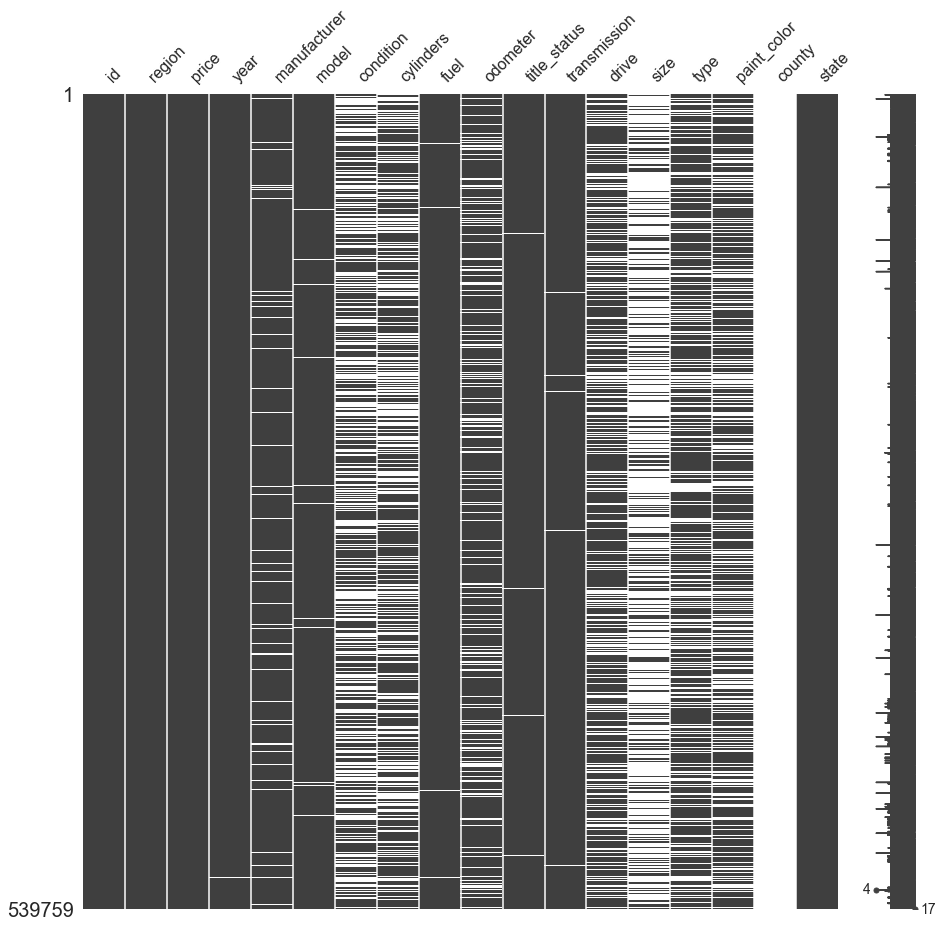

In [14]:
msno.matrix(df, figsize=(15, 15))

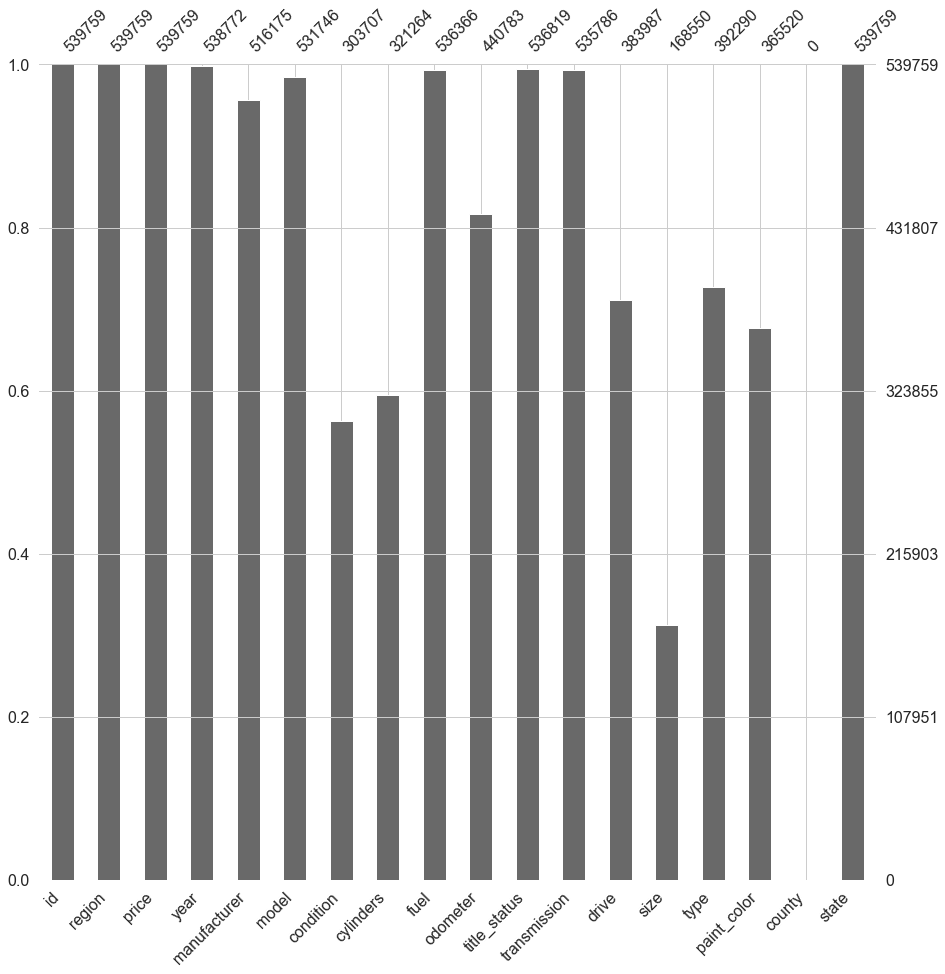

In [16]:
msno.bar(df, figsize=(15, 15))

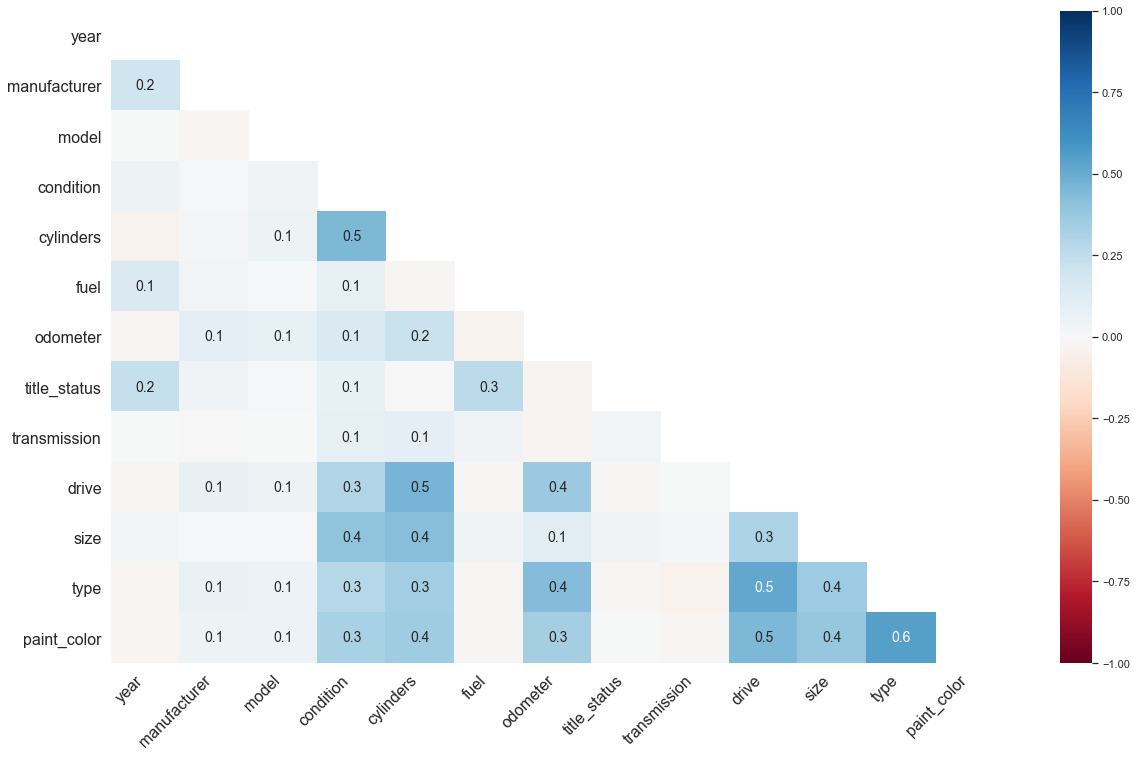

In [17]:
msno.heatmap(df)

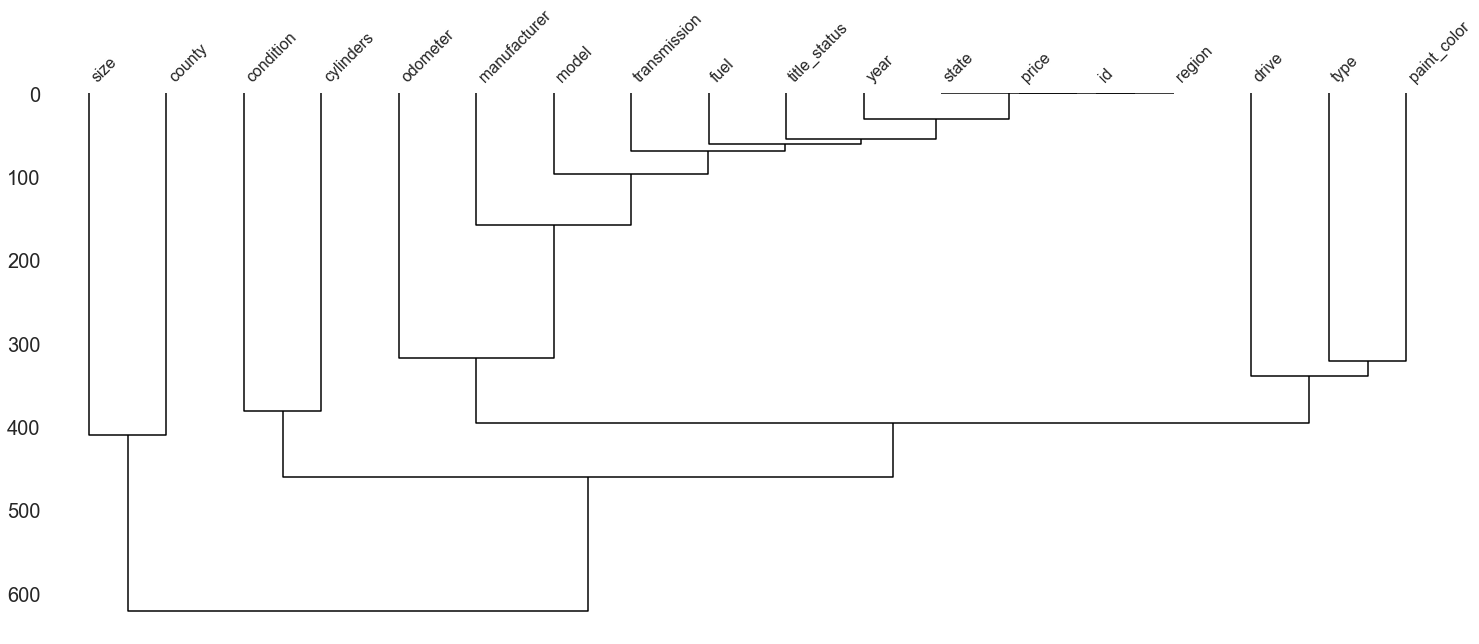

In [18]:
>>> msno.dendrogram(df)


In [15]:
df.to_csv('vehicle_reduced.csv')
